In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('MarketData.csv')
for col in df.columns:
    print(col)

Date
Open
High
Low
Close
Adj Close
Volume


In [3]:
#Compute the fractional difference between current day open and previous day open (Parameter 1)
df['parameter_1']=(df['Open']/df['Open'].shift(1))-1
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,parameter_1
0,1/3/2000,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000,NaN
1,1/4/2000,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,-0.009549
2,1/5/2000,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,-0.038345
3,1/6/2000,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,0.001922
4,1/7/2000,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,0.000956


In [4]:
#Compute the fractional difference between current day open and current day close (Parameter 2)
df['parameter_2']=(df['Open']/df['Close'])-1
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,parameter_1,parameter_2
0,1/3/2000,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000,NaN,0.009641
1,1/4/2000,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,-0.009549,0.039874
2,1/5/2000,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,-0.038345,-0.001918
3,1/6/2000,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,0.001922,-0.000955
4,1/7/2000,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,0.000956,-0.026376


In [5]:
#Compute the fractional difference between current day volume and previous day volume (Parameter 3)
df['parameter_3']=(df['Volume']/df['Volume'].shift(1))-1
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,parameter_1,parameter_2,parameter_3
0,1/3/2000,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000,NaN,0.009641,NaN
1,1/4/2000,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,-0.009549,0.039874,0.082850
2,1/5/2000,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,-0.038345,-0.001918,0.075818
3,1/6/2000,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,0.001922,-0.000955,0.006264
4,1/7/2000,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,0.000956,-0.026376,0.121670


In [6]:
df1=df[['parameter_1', 'parameter_2', 'parameter_3']]
for col in df1.columns:
    print(col)
df1 = df1.dropna()

parameter_1
parameter_2
parameter_3


In [7]:
from sklearn import datasets
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

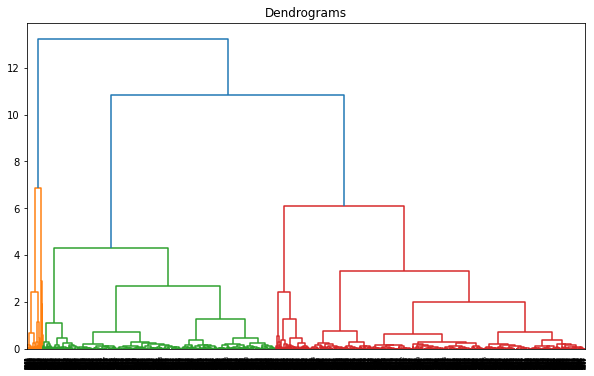

In [8]:
plt.figure(figsize=(10,6))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(df1, method='ward'))

In [ ]:
print(dend)
print(dend['color_list'])

In [9]:
unique_color = set(dend['color_list'])
print(unique_color)
optimal_number_of_cluster=len(unique_color)-1
print(optimal_number_of_cluster)


{'C2', 'C3', 'C0', 'C1'}
3


Cluster the above data set (Parameters 1, 2, 3)

In [10]:
from sklearn.preprocessing import StandardScaler
df1=df[['parameter_1', 'parameter_2', 'parameter_3']]
for col in df1.columns:
    print(col)

df1 = df1.dropna()

parameter_1
parameter_2
parameter_3


In [11]:
scalar = StandardScaler()

In [12]:
df1[['parameter_1T','parameter_2T','parameter_3T']] = scalar.fit_transform(df1[['parameter_1','parameter_2','parameter_3']])

In [13]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k):
        kmeans= KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias)
    plt.xlabel('number of clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

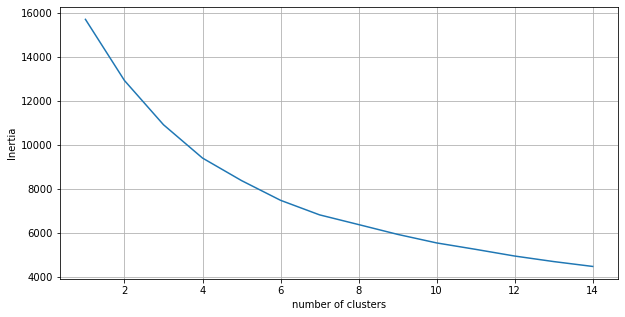

In [14]:
optimise_k_means(df1[['parameter_1T','parameter_2T','parameter_3T']], 15)

In [15]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df1[['parameter_1T','parameter_2T','parameter_3T']])

KMeans(n_clusters=3)

In [16]:
df1['kmeans_3']= kmeans.labels_
df1

,parameter_1,parameter_2,parameter_3,parameter_1T,parameter_2T,parameter_3T,kmeans_3
1,-0.009549,0.039874,0.082850,-0.836239,3.447063,0.309502,1
2,-0.038345,-0.001918,0.075818,-3.297586,-0.162481,0.275779,2
3,0.001922,-0.000955,0.006264,0.144289,-0.079244,-0.057743,0
4,0.000956,-0.026376,0.121670,0.061675,-2.274840,0.495649,2
5,0.027090,-0.011066,-0.130917,2.295583,-0.952554,-0.715556,0
...,...,...,...,...,...,...,...
5227,0.011663,-0.009677,-0.129495,0.976900,-0.832558,-0.708737,0
5228,0.009711,0.006287,0.051380,0.810082,0.546234,0.158595,0
5229,-0.005246,0.007682,0.065318,-0.468438,0.666707,0.225429,1
5230,-0.017565,-0.008503,-0.032023,-1.521429,-0.731210,-0.241340,2


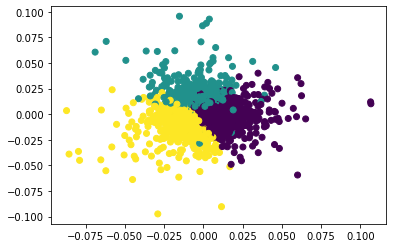

In [17]:
plt.scatter(x=df1['parameter_1'],y=df1['parameter_2'], c=df1['kmeans_3'])